## Clickbait Classification (Part 1)
 - Using Universal Sentence Encoder (USE) & Classifier (Deep Learning) DL Approach Classifier

Dataset Source: https://www.kaggle.com/datasets/amananandrai/clickbait-dataset

##### Import Necessary Libraries

In [0]:
import pandas as pd

import pyspark

from pyspark.sql.types import StructType, StructField, StringType, ArrayType
import pyspark.sql.functions as F

import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline

##### Define Function to Ingest Dataset

In [0]:
def ingest_dataset(file_location: str, schema: StructType) -> pyspark.sql.dataframe.DataFrame:
    file_type = "csv"
    infer_schema = "false"
    first_row_is_header = "true"
    delimiter = ","
    
    dataset = spark.read.format(file_type) \
      .option("inferSchema", infer_schema) \
      .option("header", first_row_is_header) \
      .option("sep", delimiter) \
      .schema(schema) \
      .load(file_location)
    
    dataset = dataset.na.drop(how='any')
    
    return dataset

##### Create Function to Display metrics

In [0]:
def metrics_eval(prediction: pd.Series, label: pd.Series, model_name: str, label_values: []) -> None:
    '''
    This function calculates and displays the following metrics:
    - Classification Report (including accuracy, recall, precision, 
       & F1-score, among others)
    - Confusion Matrix
    '''
    
    from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
    
    print("-------------------------------------------------------------")
    print(f"The {model_name} Model")
    print("-------------------------------------------------------------")
    print(f"Classification Report for the {model_name} Model:")

    if label_values != []:
        report = classification_report(label, prediction, zero_division=1, target_names=label_values)
    else:
        report = classification_report(label, prediction, zero_division=1)
    print(report)

    print("-------------------------------------------------------------")

    print(f"Confusion Matrix for the {model_name} Model:")
    cm = confusion_matrix(label, prediction)
    
    if label_values != []:
        dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_values)
    else:
        dist = ConfusionMatrixDisplay(confusion_matrix=cm)
    dist.plot()

    print("-------------------------------------------------------------")

#### Data Ingestion & Preprocessing

##### Ingest Dataset

In [0]:
data_file = "/FileStore/tables/clickbait_data.csv"

orig_schema = StructType([
    StructField("text", StringType(), True),
    StructField("labels", StringType(), True),
])

df = ingest_dataset(data_file, orig_schema)

df.printSchema()

root
 |-- text: string (nullable = true)
 |-- labels: string (nullable = true)



##### Data Preprocessing

In [0]:
df = df.filter(F.col("labels").isin([0, 1]))

df = df.withColumn("text_len", F.size(F.split(F.col("text"), " ")))

display(df)

text,labels,text_len
Should I Get Bings,1,4
Which TV Female Friend Group Do You Belong In,1,9
"""The New """"Star Wars: The Force Awakens"""" Trailer Is Here To Give You Chills""",1,14
"""This Vine Of New York On """"Celebrity Big Brother"""" Is Fucking Perfect""",1,12
A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor,1,18
How To Flirt With Queer Girls Without Making A Total Fool Of Yourself,1,13
32 Cute Things To Distract From Your Awkward Thanksgiving,1,9
If Disney Princesses Were From Florida,1,6
What's A Quote Or Lyric That Best Describes Your Depression,1,10
"""Natalie Dormer And Sam Claflin Play A Game To See How They'd Actually Last In """"The Hunger Games""""""",1,18


Output can only be rendered in Databricks

Output can only be rendered in Databricks

##### Data Preprocessing (Part 2)

In [0]:
df = df.drop("text_len")

#df = df.withColumn("labels", F.array(df["labels"]))

print(f"There are {df.count()} samples in this dataset.")
df.printSchema()

There are 31928 samples in this dataset.
root
 |-- text: string (nullable = true)
 |-- labels: string (nullable = true)



##### Split Dataset into Training & Testing Datasets

In [0]:
train_ds, test_ds = df.randomSplit(weights=[0.80, 0.20], seed=42)

train_ds = train_ds.persist()
test_ds = test_ds.persist()

print(f"{train_ds.count()} Samples in Training Dataset")
print(f"{test_ds.count()} Samples in Testing Dataset")

25572 Samples in Training Dataset
6356 Samples in Testing Dataset


##### Basic Values/Constants

In [0]:
BATCH_SIZE = 64
LR = 1e-3
NUM_OF_EPOCHS = 15

##### Build Pipeline Stages

In [0]:
doc = DocumentAssembler()\
        .setInputCol("text")\
        .setOutputCol("document")

embeds = UniversalSentenceEncoder.pretrained()\
        .setInputCols("document")\
        .setOutputCol("embeddings")

doc_clf = ClassifierDLApproach()\
        .setInputCols("embeddings")\
        .setOutputCol("category")\
        .setLabelColumn("labels")\
        .setBatchSize(BATCH_SIZE)\
        .setMaxEpochs(NUM_OF_EPOCHS)\
        .setLr(LR)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


##### Build Pipeline

In [0]:
clickbait_clf_pipeline = Pipeline().setStages([
    doc, 
    embeds, 
    doc_clf
])

##### Fit Model Using Training Dataset

In [0]:
clf_model = clickbait_clf_pipeline.fit(train_ds)

#### Evaluate Model

##### Inference: Predictions Using Testing Dataset

In [0]:
preds = clf_model.transform(test_ds)

##### Prepare Predictions for Evaluation Function

In [0]:
condensed_preds = (preds.select(F.col("labels").alias("ground_truth"), \
                                F.col("category.result").alias("predictions"))).toPandas()

condensed_preds["ground_truth"] = condensed_preds["ground_truth"].apply(lambda x : x[0])

condensed_preds["predictions"] = condensed_preds["predictions"].apply(lambda x : x[0])

##### Display Metrics

-------------------------------------------------------------
The Clickbait CLF (Bert Pretrained) Model
-------------------------------------------------------------
Classification Report for the Clickbait CLF (Bert Pretrained) Model:
              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97      3225
   Clickbait       0.97      0.98      0.97      3131

    accuracy                           0.97      6356
   macro avg       0.97      0.97      0.97      6356
weighted avg       0.97      0.97      0.97      6356

-------------------------------------------------------------
Confusion Matrix for the Clickbait CLF (Bert Pretrained) Model:
-------------------------------------------------------------


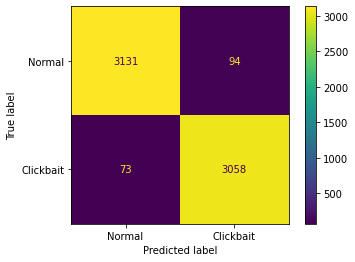

In [0]:
labels_converter = ["Normal", "Clickbait"]
metrics_eval(condensed_preds["ground_truth"], \
             condensed_preds["predictions"], \
             "Clickbait CLF (Bert Pretrained)", \
             labels_converter)

##### End Spark Session

In [0]:
train_ds = train_ds.persist()
test_ds = test_ds.persist()

spark.stop()

### Notes & Other Takeaways From This Project
****
- I am pleasantly surprised in a very good way at the results of this evaluation. I am curious to see how this compares to the other two versions of this project!
****
- I am closing in on my goal of annotating and adding type-hints for all functions that I create.
****